In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.datasets import fetch_mldata
import sklearn
import matplotlib 

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  'pixel52',
  'p

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
X.shape  # 784 means 28x28 pixels.

(70000, 784)

In [8]:
y.shape  # 1D array containing labels

(70000,)

In [18]:
some_digit = X[36000]

In [9]:
some_digit_image = some_digit.reshape(28,28)

<IPython.core.display.Javascript object>


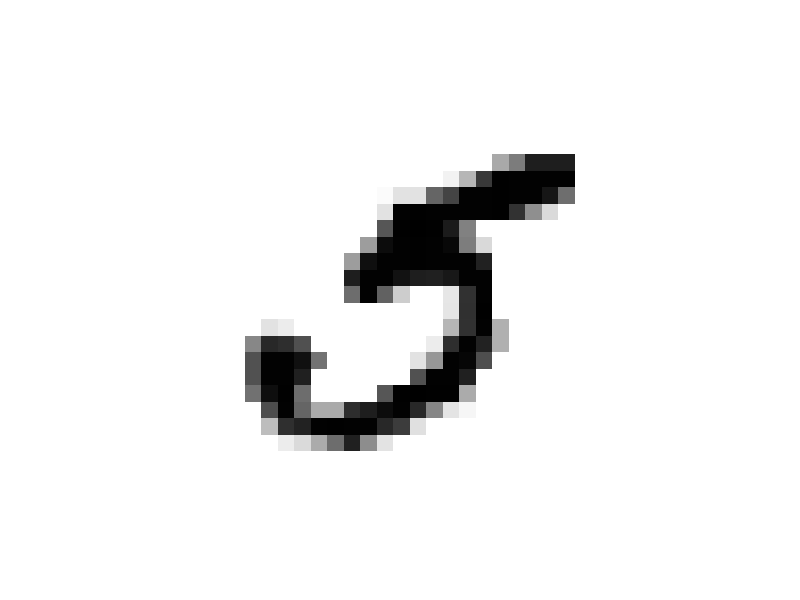

(-0.5, 27.5, 27.5, -0.5)

In [10]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [11]:
y[36000]  # Ansewer

5

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
shuffle_index = np.random.permutation(60000)

In [14]:
shuffle_index  # random array of indexes

array([47226, 16670, 33801, ..., 30675, 59829, 30129])

In [15]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [16]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42,max_iter=5, tol=-np.infty)

In [18]:
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_classifier.predict([X_train[56]])

array([False])

<IPython.core.display.Javascript object>


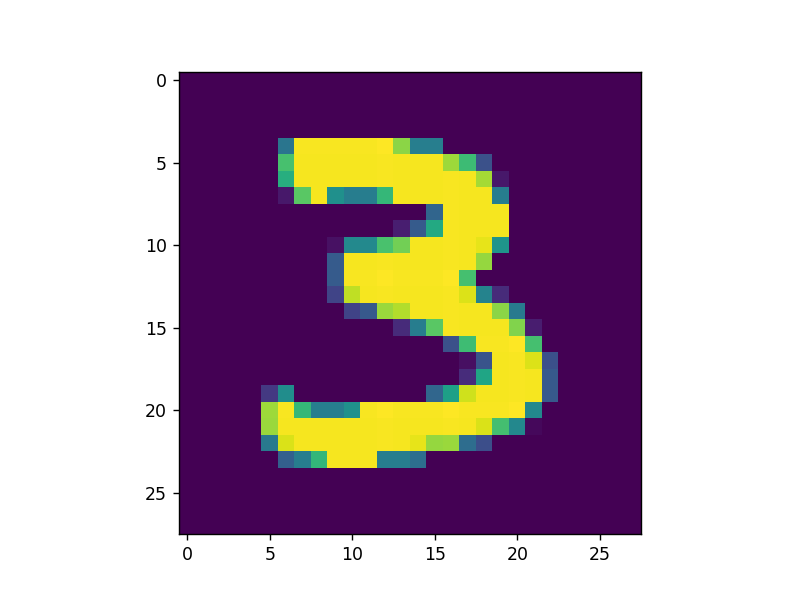

In [22]:
plt.imshow(X_train[56].reshape(28,28))

In [23]:
y_train_5

array([False, False,  True, ...,  True, False, False])

In [24]:
y_train[0]

7

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [27]:
y_train_pred

array([False, False, False, ...,  True, False, False])

In [116]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_train_5, y_train_pred)

array([[54070,   509],
       [ 1715,  3706]], dtype=int64)

In [30]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [31]:
from sklearn.metrics import precision_score, recall_score

In [32]:
precision_score(y_train_5,y_train_pred)  #  4217/(4217+941)

0.8792408066429419

In [33]:
4217/(4217+941)

0.8175649476541295

In [34]:
recall_score(y_train_5,y_train_pred)  #  4217 /(4217 + 1204)

0.683637705220439

In [35]:
4217 /(4217 + 1204)

0.7779007563180225

In [36]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7691988376919884

In [39]:
y_scores = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3,method="decision_function")

In [40]:
y_scores 

array([-598288.38747367, -659234.81009268, -152997.36612532, ...,
        245110.47022217, -179723.78268454, -241633.84193857])

In [41]:
thresh_hold = 20000

In [42]:
y_manual_treshhold = y_scores > thresh_hold

In [43]:
y_manual_treshhold

array([False, False, False, ...,  True, False, False])

In [44]:
confusion_matrix(y_train_5, y_manual_treshhold)

array([[54189,   390],
       [ 1915,  3506]], dtype=int64)

In [45]:
precision_score(y_train_5, y_manual_treshhold)   #Precision increaed

0.8998973305954825

In [46]:
recall_score(y_train_5, y_manual_treshhold)  # Recall decreased

0.6467441431470209

In [47]:
from sklearn.metrics import precision_recall_curve

In [48]:
precision, recall, thresh = precision_recall_curve(y_train_5, y_scores)

In [49]:
precision

array([0.09059309, 0.09057789, 0.09057941, ..., 1.        , 1.        ,
       1.        ])

In [50]:
recall

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [51]:
thresh

array([-1827593.3740755 , -1816370.33316485, -1816307.47339271, ...,
         837699.85997705,   839952.10998824,   905854.62691619])

<IPython.core.display.Javascript object>


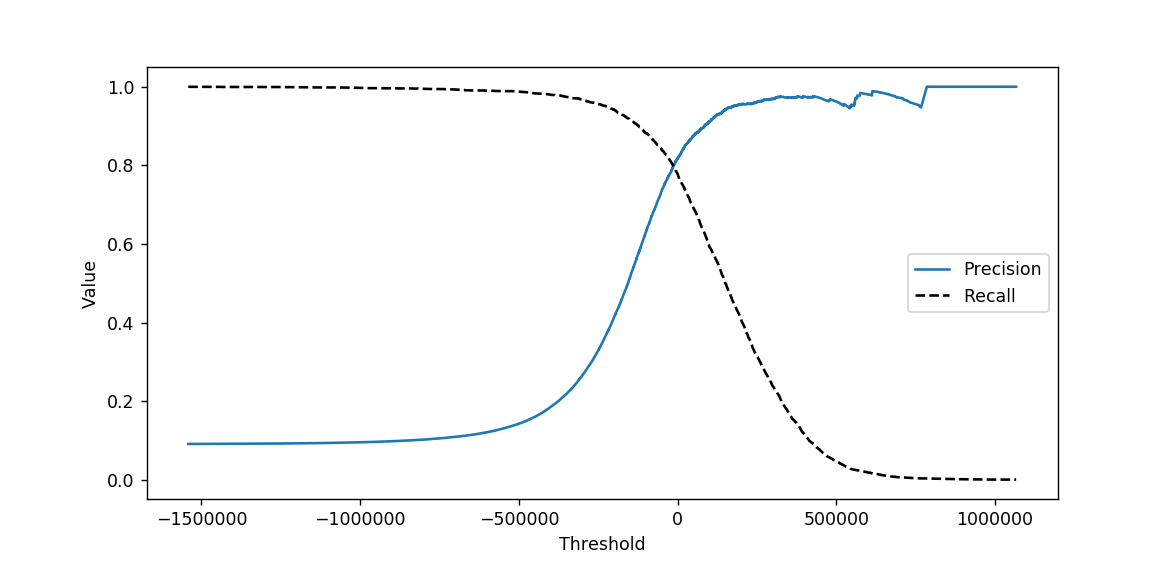

Text(0, 0.5, 'Value')

In [94]:
plt.plot(thresh,precision[:-1], label='Precision')
plt.plot(thresh, recall[:-1], 'k--',label='Recall')
plt.xlabel("Threshold", fontsize=10)
plt.legend(fontsize=10)
plt.ylabel("Value", fontsize=10)

<IPython.core.display.Javascript object>


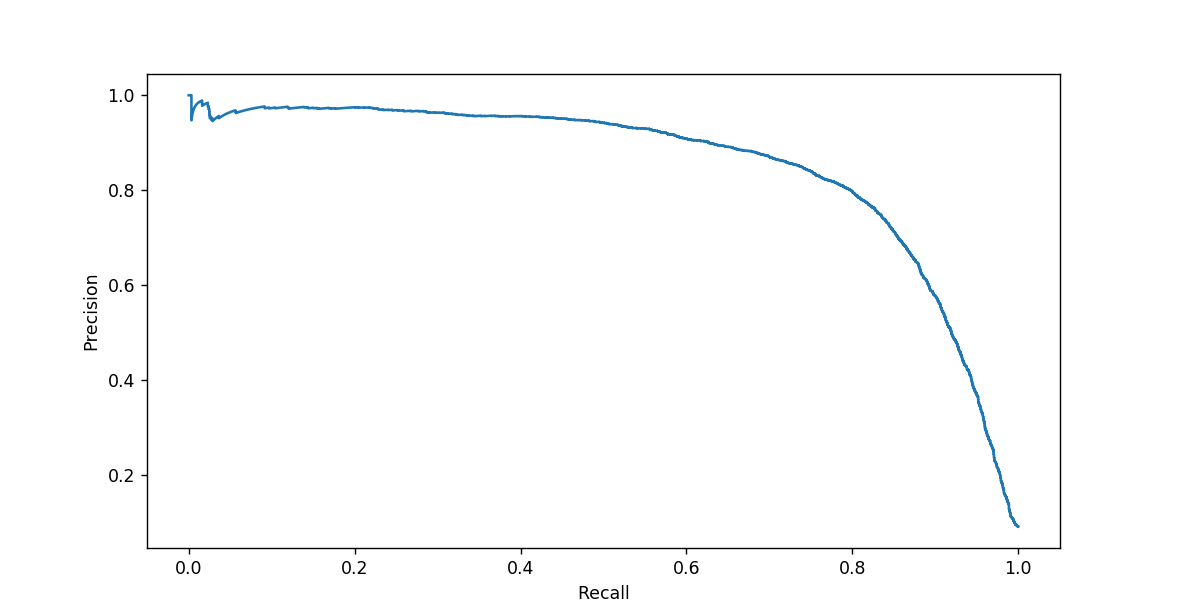

Text(0, 0.5, 'Precision')

In [95]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

## The curve falls sharply after 80 %, so it would be best to select thresh at 80% for both values to be good

In [97]:
y_90_precision = y_scores> 70000

In [100]:
precision_score(y_train_5, y_90_precision)  # 90 % presicion

0.8903662819869543

In [102]:
recall_score(y_train_5,y_90_precision)  # 65 % recall

0.6546762589928058

In [103]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

<IPython.core.display.Javascript object>


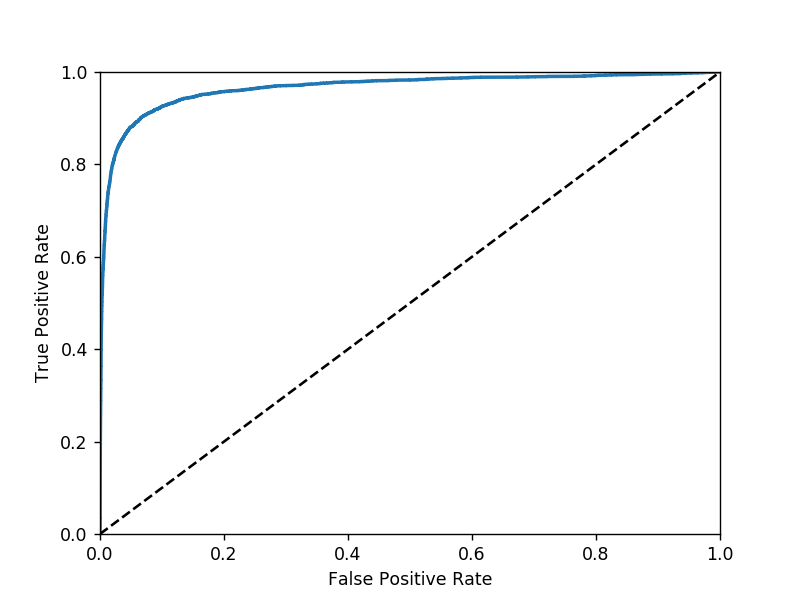

In [131]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces. The dotted line represents the ROC curve of a purely
random classifier; a good classifier stays as far away from that line as possible (toward
the top-left corner).
One way to compare classifiers is to measure the area under the curve (AUC). A per‐
fect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will
have a ROC AUC eq

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.


In [107]:
from sklearn.metrics import roc_auc_score

In [109]:
roc_auc_score(y_train_5, y_scores)

0.9657386471324316

The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)

In [115]:
y_probablities_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [124]:
y_scores_forest = y_probablities_forest[:, 1]

In [126]:
y_scores_forest

array([0., 0., 0., ..., 0., 0., 0.])

In [127]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

<IPython.core.display.Javascript object>


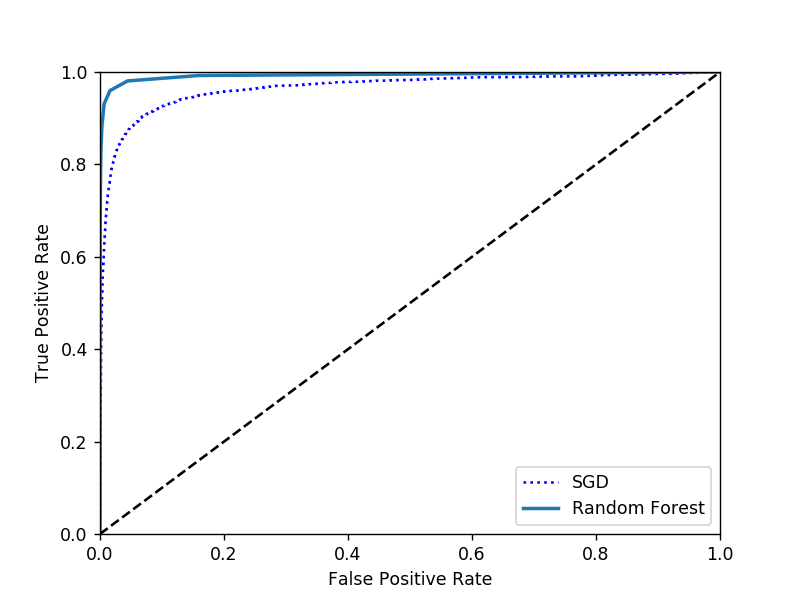

In [132]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="best")
plt.show()

In [137]:
roc_auc_score(y_train_5, y_scores_forest)  # Way better

0.9929410669401978

In [156]:
recall_score(y_train_5,y_scores_forest>0.3)

0.9306401033019738

In [155]:
precision_score(y_train_5,y_scores_forest>0.3)

0.9337405145289653

# Multiclass Classification 
## (More than one group, the above classifier which detected only 5s is known as binary classifier which detects only one item.)

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are
capable of handling multiple classes directly. Others (such as Support Vector Machine
classifiers or Linear classifiers) are strictly binary classifiers. However, there are vari‐
ous strategies that you can use to perform multiclass classification using multiple
binary classifiers.

For example, one way to create a system that can classify the digit images into 10
classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a
1-detector, a 2-detector, and so on). Then when you want to classify an image, you get
the decision score from each classifier for that image and you select the class whose
classifier outputs the highest score. This is called the one-versus-all (OvA) strategy
(also called one-versus-the-rest).


In [52]:
sgd_classifier.fit(X_train, y_train)   # Not y_train_5

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
sgd_classifier.predict([some_digit])

array([5], dtype=int8)

In [55]:
some_digit_score = sgd_classifier.decision_function([some_digit])

In [56]:
some_digit_score   # 5 Has max score.

array([[-211797.36938578, -358839.0994522 , -240134.76511476,
        -159418.78546015, -608872.39881117,   76964.9096766 ,
        -803610.55606474, -204298.94099851, -652631.67119457,
        -590380.90654129]])

In [57]:
from sklearn.multiclass import OneVsOneClassifier

In [60]:
ovo_classifier = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))

In [61]:
ovo_classifier.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [63]:
ovo_classifier.predict([some_digit])

array([5], dtype=int8)

In [64]:
ovo_classifier.decision_function([some_digit])

array([[ 7.21065214,  4.88927001,  4.9653337 ,  8.26894769,  2.85560001,
         9.5       , -0.29747154,  3.99202772,  1.76256781,  1.85307247]])

In [68]:
ovo_classifier.predict([X_test[5]])

array([0], dtype=int8)

<IPython.core.display.Javascript object>


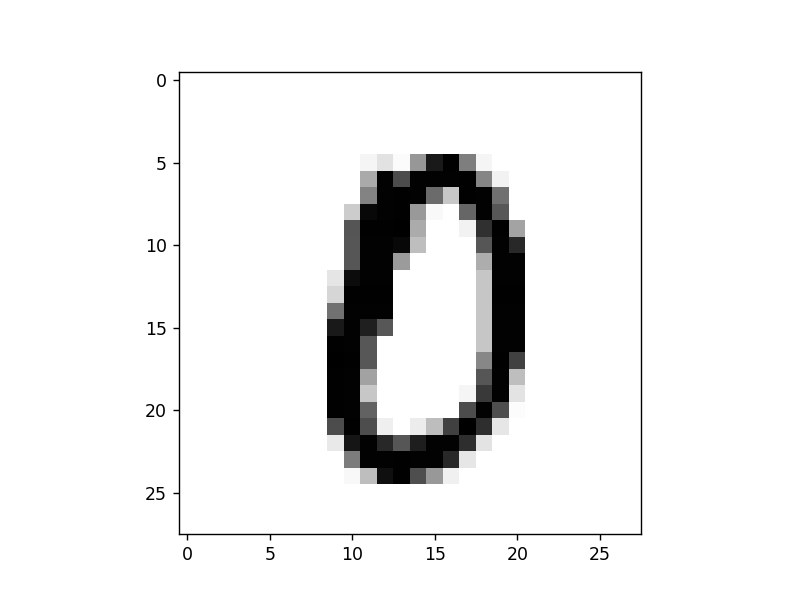

In [70]:
plt.imshow(X_test[5].reshape(28,28),cmap=matplotlib.cm.binary)

In [96]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [97]:
y_pred_forest = forest_clf.predict(X_test)

In [98]:
y_pred_forest

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [93]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,y_pred_forest, normalize = True)

0.949

In [109]:
from sklearn.model_selection import cross_val_score

In [111]:
 cross_val_score(sgd_classifier, X_train, y_train, cv=3, scoring="accuracy")  # Pretty good

array([0.86462707, 0.86619331, 0.85427814])

In [112]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train, cv=3)

In [120]:
conf_mx = confusion_matrix(y_train,y_train_pred)

In [121]:
conf_mx

array([[5656,    2,   37,   14,   11,   52,   91,    8,   44,    8],
       [   1, 6173,   74,   17,    7,   28,   20,   15,  381,   26],
       [  43,   75, 5124,   93,   72,   59,  153,   73,  251,   15],
       [  30,   35,  237, 5056,   11,  378,   48,   72,  204,   60],
       [  17,   19,   34,   27, 5046,   23,   99,   38,  182,  357],
       [  67,   30,   44,  233,   56, 4340,  190,   35,  349,   77],
       [  28,   17,   57,    5,   32,  106, 5623,    4,   40,    6],
       [  31,   14,   89,   48,   56,   24,    9, 5666,   92,  236],
       [  53,  190,  241,  192,   49,  549,   99,   40, 4300,  138],
       [  49,   25,   49,  124,  270,   89,    9,  401,  215, 4718]],
      dtype=int64)

<IPython.core.display.Javascript object>


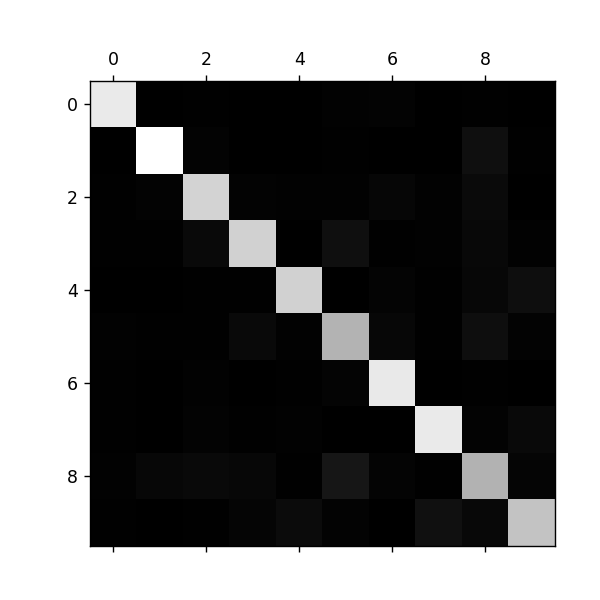

In [134]:
plt.matshow(conf_mx,cmap = 'gray')

# Multilabel Classification
Until now each instance has always been assigned to just one class. In some cases you
may want your classifier to output multiple classes for each instance. For example,
consider a face-recognition classifier: what should it do if it recognizes several people
on the same picture? Of course it should attach one label per person it recognizes. Say
the classifier has been trained to recognize three faces, Alice, Bob, and Charlie; then
when it is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning
“Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple
binary labels is called a multilabel classification system.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
y_train_large = y_train >= 7

In [11]:
y_train_large

array([False, False, False, ...,  True,  True,  True])

In [12]:
y_train_odd = y_train % 2 != 0

In [13]:
y_train_odd

array([False, False, False, ...,  True,  True,  True])

In [14]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [15]:
y_multilabel

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [ True,  True],
       [ True,  True],
       [ True,  True]])

In [16]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [22]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [23]:
noise

array([[34, 48, 67, ..., 28, 72, 17],
       [48, 55, 61, ..., 83, 73, 18],
       [67,  9, 83, ..., 48, 87, 13],
       ...,
       [82, 16, 51, ..., 16, 84, 93],
       [29, 51, 43, ..., 41, 72, 38],
       [ 1, 42, 35, ..., 38, 22, 57]])

In [24]:
noise[0]

array([34, 48, 67, 39, 49, 73, 33, 39, 98, 15, 88, 10, 38,  6, 65, 42, 94,
       35, 75, 89, 84, 12, 14, 74,  9, 36, 43, 87, 29, 69, 42, 76, 27, 72,
       89, 17, 20,  7, 61, 27, 24, 14, 16, 30, 29, 63, 32, 39, 30, 42, 75,
       44, 86, 65, 19,  1, 90, 32, 37, 75, 88, 10, 29, 77, 28, 72, 39, 41,
        8, 33, 40, 47, 98, 98, 42,  1, 45,  3, 96, 42, 70, 73, 71, 77, 96,
       94, 15, 48, 27, 77, 91, 63, 11, 84, 31, 77, 69, 80, 99, 20, 65, 75,
       15, 41, 20, 28, 37, 20, 12, 20, 40, 94, 47, 33, 53, 78, 53, 63, 22,
       34, 98, 85, 41, 19, 78, 31, 41, 74, 18, 50, 47, 68, 24, 85, 66, 96,
       87, 86, 50, 43, 88, 86, 62, 89, 20,  0, 96, 44, 91, 86, 80,  3, 57,
       60, 97, 50, 62, 80, 94, 70, 66, 60, 88, 13,  3, 22, 18, 94, 83, 25,
        2, 29, 43, 44, 47, 77, 62, 45, 32, 90, 74, 25, 24, 16, 10, 32, 93,
       64, 60, 71, 19,  4, 31, 60, 61, 92, 66, 51,  5, 85, 89, 56, 76, 49,
       28, 73, 13, 99, 92,  7, 20, 61,  6, 92, 99, 78, 55,  6, 74,  3, 23,
       82, 84, 54, 94, 82

In [25]:
X_train_mod = X_train + noise

In [26]:
noise = np.random.randint(0, 100, (len(X_test), 784))

In [28]:
X_test_mod = X_test + noise

In [29]:
y_train_mod = X_train
y_test_mod = X_test

<IPython.core.display.Javascript object>


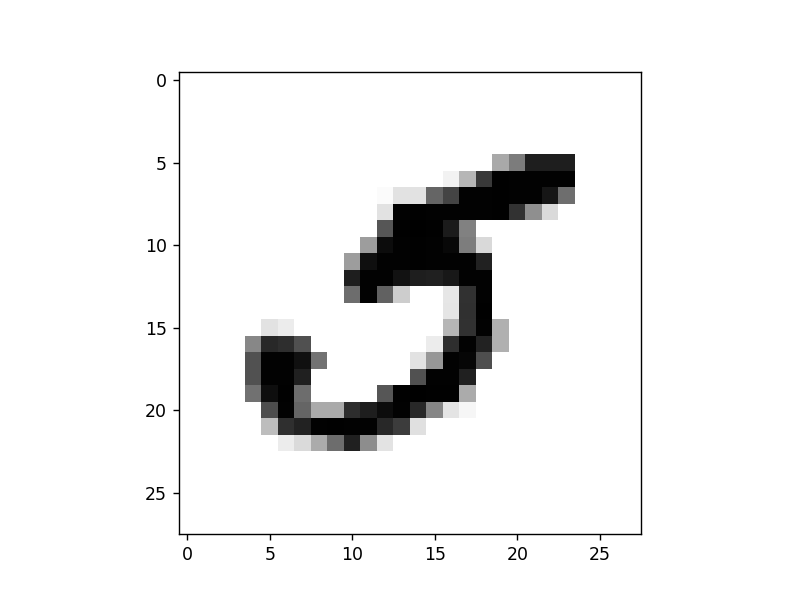

In [35]:
plt.imshow(some_digit.reshape(28,28), cmap = matplotlib.cm.binary)   # Original image

<IPython.core.display.Javascript object>


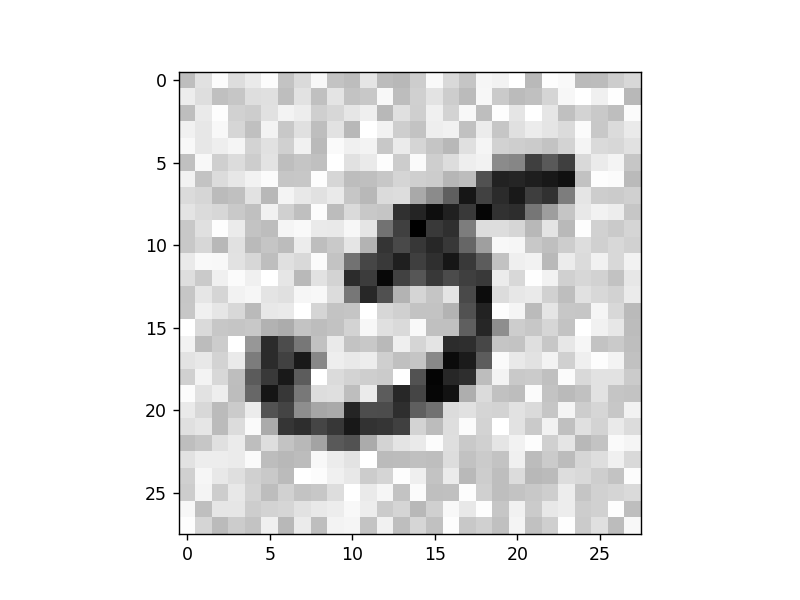

In [37]:
plt.imshow(X_train_mod[36000].reshape(28,28), cmap = matplotlib.cm.binary)  # Noisy image

In [38]:
knn_clf.fit(X_train_mod,y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
test = X_test_mod[5]

<IPython.core.display.Javascript object>


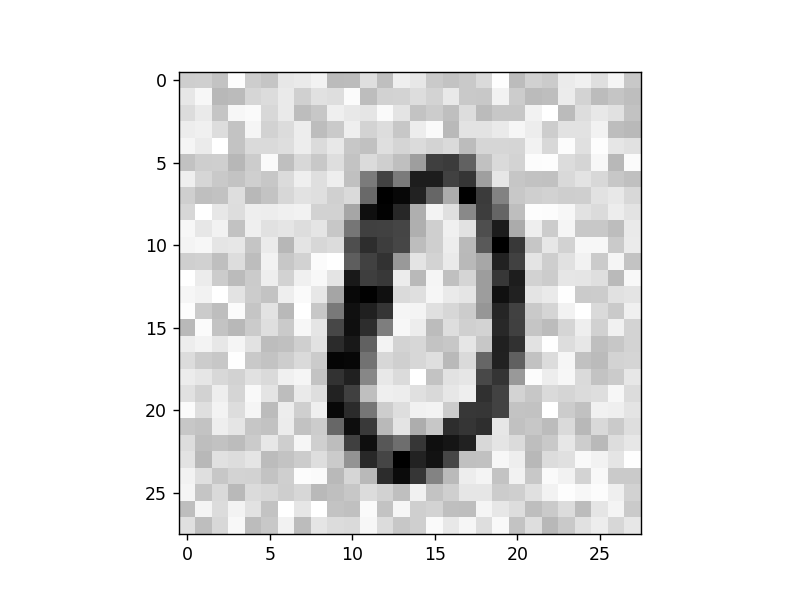

In [41]:
plt.imshow(X_test_mod[5].reshape(28,28), cmap = matplotlib.cm.binary)   # Noisy image

In [44]:
res = knn_clf.predict([X_test_mod[5]])     

<IPython.core.display.Javascript object>


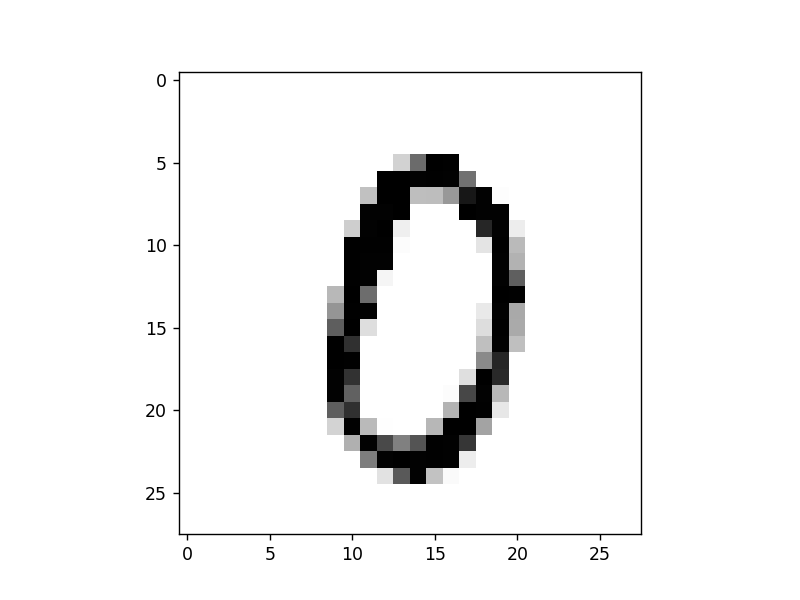

In [47]:
plt.imshow(res.reshape(28,28), cmap = matplotlib.cm.binary)   # Prediction result

<IPython.core.display.Javascript object>


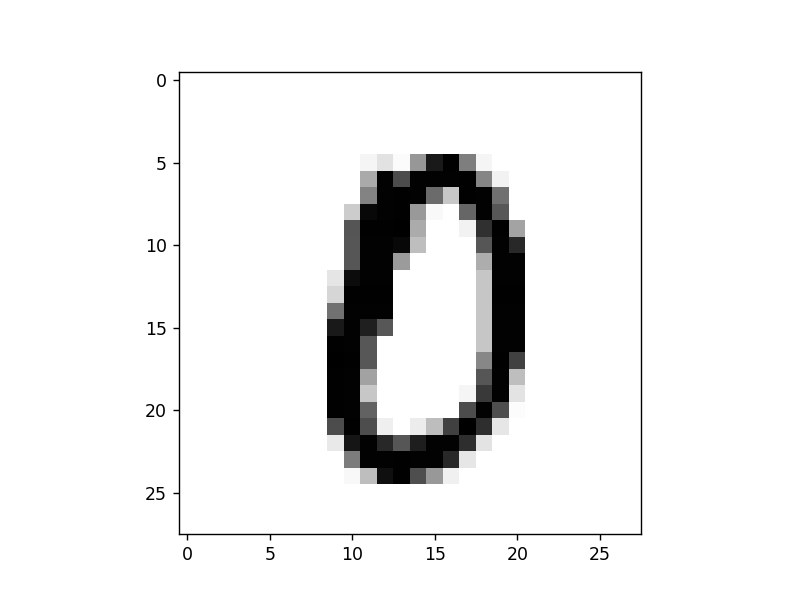

In [48]:
plt.imshow(y_test_mod[5].reshape(28,28), cmap = matplotlib.cm.binary)   # Originnal result